# KNN을 이용한 붓꽃(Iris) 분류

이 노트북에서는 K-Nearest Neighbors(KNN) 알고리즘을 사용하여 붓꽃 데이터셋을 분류하는 방법을 알아봅니다.

In [16]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 그래프 스타일 설정
plt.style.use('ggplot') 
%matplotlib inline

## 1. 데이터 로드 및 탐색

In [17]:
# 붓꽃 데이터셋 로드
file_path = "C:/Users/wlsgh/Downloads/iris.csv" 
df = pd.read_csv(file_path)


print("Actual column names in the CSV:")
print(df.columns.tolist())

feature_columns = df.columns[:-1] 
X = df[feature_columns].values


species_column = df.columns[-1]
target_names = df[species_column].unique()
y = df[species_column].map(dict(zip(target_names, range(len(target_names))))).values

# 데이터 확인
print(f"\n데이터셋 형태: {X.shape}")
print(f"클래스 레이블: {target_names}")
print("\n처음 5개 샘플:")
df.head()

Actual column names in the CSV:
['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']

데이터셋 형태: (150, 4)
클래스 레이블: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

처음 5개 샘플:


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 513

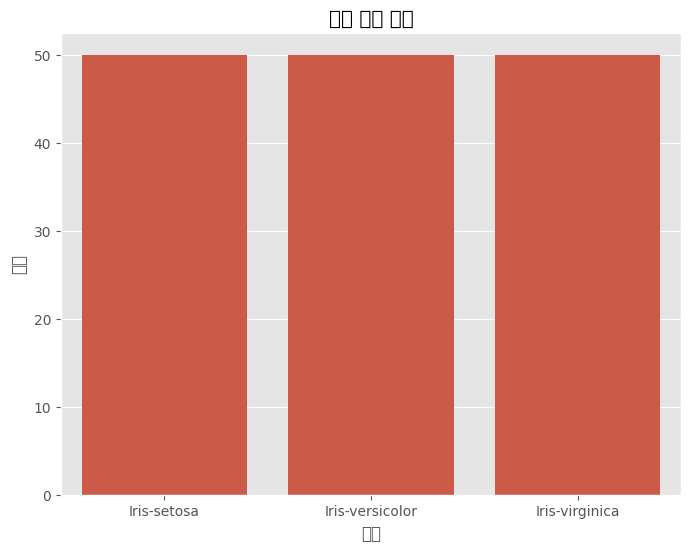

In [18]:
# 클래스 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='Name', data=df)  # Changed 'species' to 'Name'
plt.title('붓꽃 종별 분포')
plt.xlabel('종류')
plt.ylabel('개수')
plt.show()

<Figure size 1200x1000 with 0 Axes>

C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552

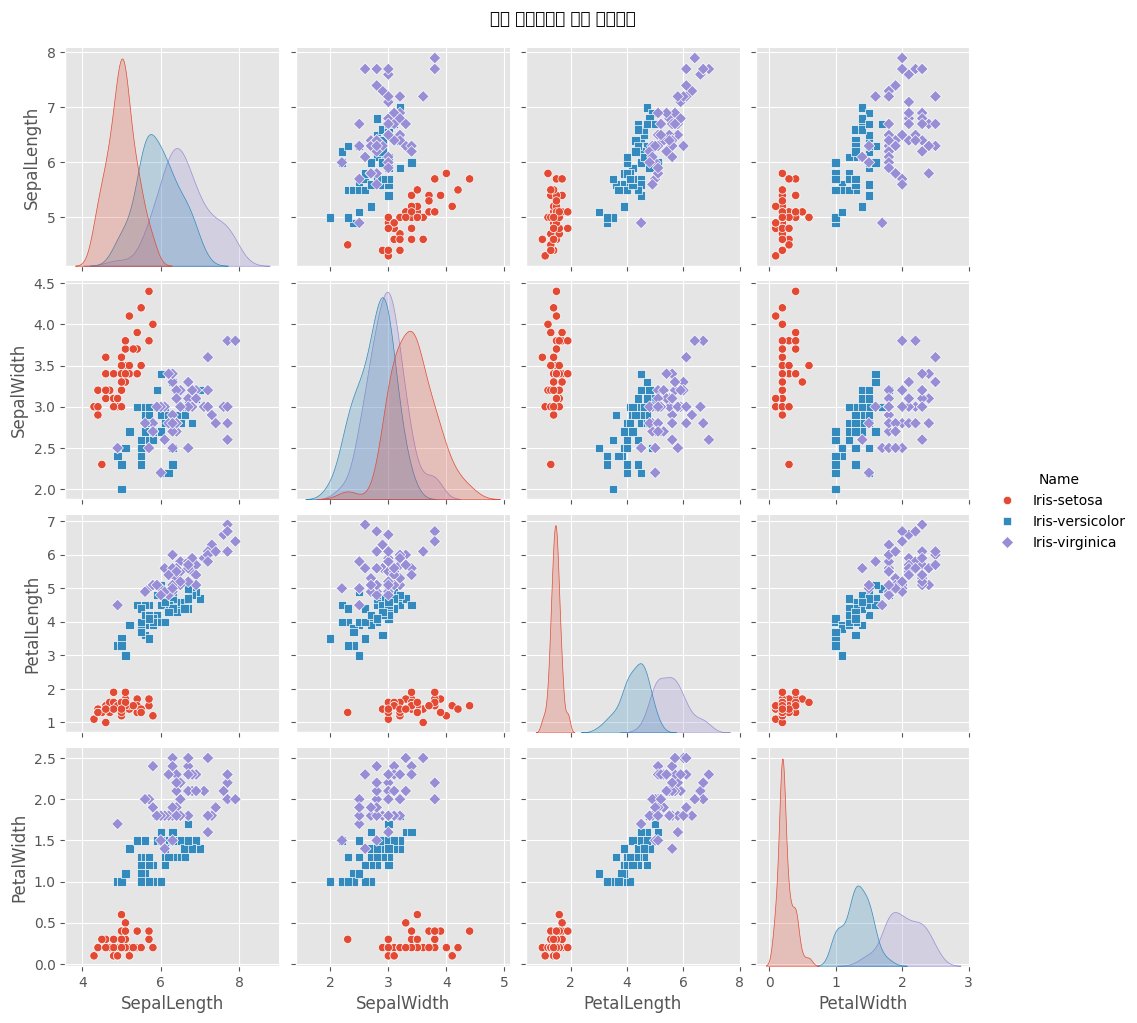

In [19]:
# 특성 분포 시각화
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='Name', markers=['o', 's', 'D'])
plt.suptitle('붓꽃 데이터셋의 특성 페어플롯', y=1.02)
plt.show()

## 2. 데이터 전처리

In [20]:
# 특성(X)과 타겟(y) 분리
X = df.drop('Name', axis=1).values
y = pd.factorize(df['Name'])[0]

# 훈련 세트와 테스트 세트로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 스케일링이 중요함)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

훈련 데이터 형태: (120, 4)
테스트 데이터 형태: (30, 4)


## 3. KNN 모델 구축 및 훈련

In [21]:
# KNN 분류기 생성 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 훈련
knn.fit(X_train_scaled, y_train)

# 예측
y_pred = knn.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

모델 정확도: 0.9333


## 4. 모델 평가

In [22]:
# 분류 보고서
print("분류 보고서:")
print(classification_report(y_test, y_pred, target_names=target_names))

분류 보고서:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48660 (

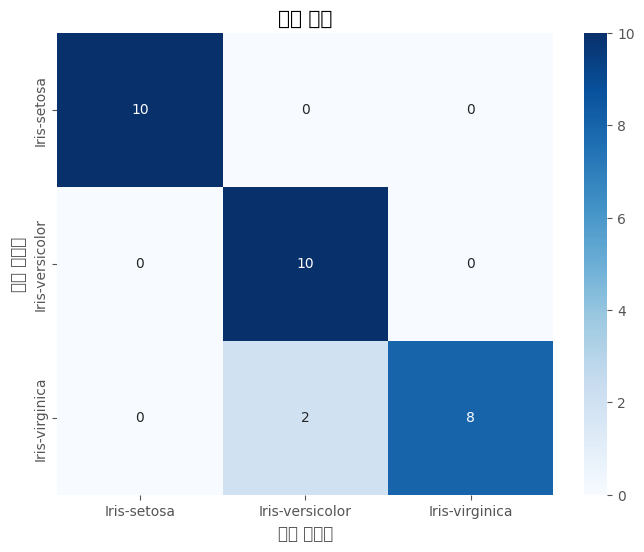

In [23]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('혼동 행렬')
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.show()

## 5. 최적의 K값 찾기

C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50

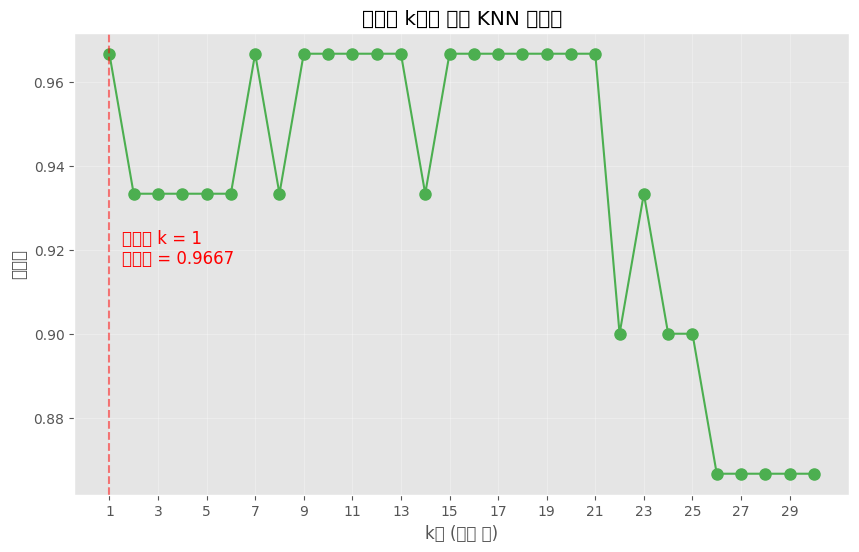

최적의 k값: 1, 정확도: 0.9667


In [24]:
# 다양한 k값에 대한 정확도 계산
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', markersize=8, linestyle='-', color='#4CAF50')
plt.title('다양한 k값에 따른 KNN 정확도')
plt.xlabel('k값 (이웃 수)')
plt.ylabel('정확도')
plt.xticks(k_range[::2])  # 2 간격으로 x축 레이블 표시
plt.grid(True, alpha=0.3)

# 최적의 k값 찾기
best_k = k_range[np.argmax(scores)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.5)
plt.text(best_k+0.5, np.max(scores)-0.05, f'최적의 k = {best_k}\n정확도 = {max(scores):.4f}', 
         fontsize=12, color='red')
plt.show()

print(f"최적의 k값: {best_k}, 정확도: {max(scores):.4f}")

## 6. 최종 모델 훈련

In [25]:
# 최적의 k값으로 모델 재훈련
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# 예측
y_pred_best = best_knn.predict(X_test_scaled)

# 최종 모델 평가
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"최종 모델 정확도: {final_accuracy:.4f}")
print("\n최종 분류 보고서:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

최종 모델 정확도: 0.9667

최종 분류 보고서:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## 7. 결정 경계 시각화

C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsgh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44

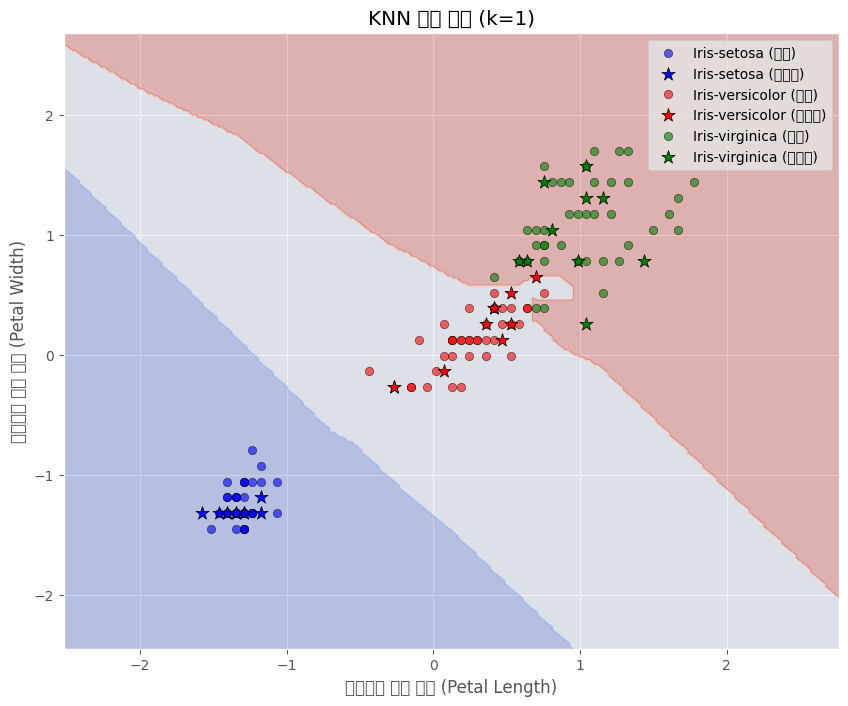

In [26]:
# 2차원으로 시각화하기 위해 두 가지 특성만 선택 (꽃잎 길이, 꽃잎 너비)
X_visual = X[:, [2, 3]]  # petal length, petal width

# 데이터 분할
X_train_visual, X_test_visual, y_train_visual, y_test_visual = train_test_split(
    X_visual, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링
scaler_visual = StandardScaler()
X_train_visual_scaled = scaler_visual.fit_transform(X_train_visual)
X_test_visual_scaled = scaler_visual.transform(X_test_visual)

# 최적의 k값으로 모델 훈련
knn_visual = KNeighborsClassifier(n_neighbors=best_k)
knn_visual.fit(X_train_visual_scaled, y_train_visual)

# 결정 경계 시각화를 위한 격자 생성
h = 0.02  # 격자 크기
x_min, x_max = X_train_visual_scaled[:, 0].min() - 1, X_train_visual_scaled[:, 0].max() + 1
y_min, y_max = X_train_visual_scaled[:, 1].min() - 1, X_train_visual_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 격자 위의 모든 점에 대해 예측
Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 그리기
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 데이터 포인트 그리기
for i, color in zip(range(3), ['blue', 'red', 'green']):
    idx = y_train_visual == i
    plt.scatter(X_train_visual_scaled[idx, 0], X_train_visual_scaled[idx, 1], 
                c=color, label=f'{target_names[i]} (훈련)', edgecolor='k', alpha=0.6)
    
    idx_test = y_test_visual == i
    plt.scatter(X_test_visual_scaled[idx_test, 0], X_test_visual_scaled[idx_test, 1], 
                c=color, marker='*', s=100, label=f'{target_names[i]} (테스트)', edgecolor='k')

plt.title(f'KNN 결정 경계 (k={best_k})')
plt.xlabel('표준화된 꽃잎 길이 (Petal Length)')
plt.ylabel('표준화된 꽃잎 너비 (Petal Width)')
plt.legend()
plt.show()

## 8. 새로운 샘플 예측

In [27]:
# 새로운 붓꽃 샘플 정의
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Setosa 특성과 유사
    [6.7, 3.1, 4.7, 1.5],  # Versicolor 특성과 유사
    [6.3, 3.3, 6.0, 2.5]   # Virginica 특성과 유사
])

# 새 샘플 스케일링
new_samples_scaled = scaler.transform(new_samples)

# 예측
predictions = best_knn.predict(new_samples_scaled)
probabilities = best_knn.predict_proba(new_samples_scaled)

# 결과 표시
print("새로운 샘플 예측 결과:")
for i, (sample, pred, prob) in enumerate(zip(new_samples, predictions, probabilities)):
    print(f"\n샘플 {i+1}: {sample}")
    print(f"예측된 클래스: {target_names[pred]}")
    print(f"클래스별 확률:")
    for j, p in enumerate(prob):
        print(f"  - {target_names[j]}: {p:.4f}")

새로운 샘플 예측 결과:

샘플 1: [5.1 3.5 1.4 0.2]
예측된 클래스: Iris-setosa
클래스별 확률:
  - Iris-setosa: 1.0000
  - Iris-versicolor: 0.0000
  - Iris-virginica: 0.0000

샘플 2: [6.7 3.1 4.7 1.5]
예측된 클래스: Iris-versicolor
클래스별 확률:
  - Iris-setosa: 0.0000
  - Iris-versicolor: 1.0000
  - Iris-virginica: 0.0000

샘플 3: [6.3 3.3 6.  2.5]
예측된 클래스: Iris-virginica
클래스별 확률:
  - Iris-setosa: 0.0000
  - Iris-versicolor: 0.0000
  - Iris-virginica: 1.0000


## 9. 결론

이 노트북에서는 KNN 알고리즘을 사용하여 붓꽃 데이터셋을 분류하는 과정을 살펴보았습니다. 주요 단계는 다음과 같습니다:

1. 데이터 로드 및 탐색
2. 데이터 전처리 (스케일링 및 훈련/테스트 분할)
3. KNN 모델 구축 및 훈련
4. 모델 평가
5. 최적의 K값 찾기
6. 결정 경계 시각화
7. 새로운 샘플 예측

KNN은 간단하지만 효과적인 분류 알고리즘이며, 적절한 K값과 데이터 전처리를 통해 높은 정확도를 달성할 수 있습니다. 이 예제에서는 붓꽃 데이터셋에서 매우 높은 분류 성능을 보여주었습니다.